In [2]:
print('Start Code')
'''
~~~
Separate major merger and minor merger runs
~~~
'''

print('Beginning')
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import itertools
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from scipy.signal import argrelextrema
import sklearn.metrics as metrics

from sklearn.preprocessing import LabelEncoder

def locate_min(a):
        smallest = min(a)
        return smallest, [index for index, element in enumerate(a) 
                      if smallest == element]
def dPA_va(row):
    return row['Delta PA']*row['v_asym']
def dPA_sa(row):
    return row['Delta PA']*row['s_asym']
def dPA_resids(row):
    return row['Delta PA']*row['resids']
def dPA_lambdar(row):
    return row['Delta PA']*row['lambda_r']
def dPA_epsilon(row):
    return row['Delta PA']*row['epsilon']
def dPA_A2(row):
    return row['Delta PA']*row['A_2']
def dPA_deltapos(row):
    return row['Delta PA']*row['deltapos']
def dPA_deltapos2(row):
    return row['Delta PA']*row['deltapos2']

def va_sa(row):
    return row['v_asym']*row['s_asym']
def va_resids(row):
    return row['v_asym']*row['resids']
def va_lambdar(row):
    return row['v_asym']*row['lambda_r']
def va_epsilon(row):
    return row['v_asym']*row['epsilon']
def va_A2(row):
    return row['v_asym']*row['A_2']
def va_deltapos(row):
    return row['v_asym']*row['deltapos']
def va_deltapos2(row):
    return row['v_asym']*row['deltapos2']


def sa_resids(row):
    return row['s_asym']*row['resids']
def sa_lambdar(row):
    return row['s_asym']*row['lambda_r']
def sa_epsilon(row):
    return row['s_asym']*row['epsilon']
def sa_A2(row):
    return row['s_asym']*row['A_2']
def sa_deltapos(row):
    return row['s_asym']*row['deltapos']
def sa_deltapos2(row):
    return row['s_asym']*row['deltapos2']



def resids_lambdar(row):
    return row['resids']*row['lambda_r']
def resids_epsilon(row):
    return row['resids']*row['epsilon']
def resids_A2(row):
    return row['resids']*row['A_2']
def resids_deltapos(row):
    return row['resids']*row['deltapos']
def resids_deltapos2(row):
    return row['resids']*row['deltapos2']

def lambdar_epsilon(row):
    return row['lambda_r']*row['epsilon']
def lambdar_A2(row):
    return row['lambda_r']*row['A_2']
def lambdar_deltapos(row):
    return row['lambda_r']*row['deltapos']
def lambdar_deltapos2(row):
    return row['lambda_r']*row['deltapos2']

def epsilon_A2(row):
    return row['epsilon']*row['A_2']
def epsilon_deltapos(row):
    return row['epsilon']*row['deltapos']
def epsilon_deltapos2(row):
    return row['epsilon']*row['deltapos2']

def A2_deltapos(row):
    return row['A_2']*row['deltapos']
def A2_deltapos2(row):
    return row['A_2']*row['deltapos2']

def deltapos_deltapos2(row):
    return row['deltapos']*row['deltapos2']



import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import itertools
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from scipy.signal import argrelextrema
import sklearn.metrics as metrics
  





feature_dict = {i:label for i,label in zip(
                range(13),
                  ('Counter',
                  'Image',
                  'class label',
                  'Myr',
                  'Viewpoint',
                'Delta PA',
                  'v_asym',
                  's_asym',
                  'resids',
                  'lambda_r',
                  'epsilon',
                  'A',
                  'A_2',
                  'deltapos',
                  'deltapos2'))}
def group_consecutives(vals, step=1):
    """Return list of consecutive lists of numbers from vals (number list)."""
    run = []
    result = [run]
    expect = None
    for v in vals:
        if (v == expect) or (expect is None):
            run.append(v)
        else:
            run = [v]
            result.append(run)
        expect = v + step
    return result


Start Code
Beginning


/Users/beckynevin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:106: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:104: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


myr [0.39, 0.59, 0.78, 0.98, 1.17, 1.37, 1.56, 1.66, 1.76, 1.81, 1.86, 1.91, 2.0, 2.05, 2.15, 2.2, 2.25, 2.35, 2.44, 2.54, 2.59]
myr_non [0.05, 0.1, 0.2, 0.29, 0.39, 0.49, 0.59, 0.98, 1.96, 2.69, 2.79, 3.62, 4.6, 5.18, 5.57, 6.06]


/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

m 10.4 10.515167380558044
terms before adding in necessary ['sa*A2' 's_asym' 'A_2']
fg3_m12_degraded_rot &
coefficients [[-1.37810135  1.61099164  1.95104099]]
coefficient std [[0.12430313 0.1261519  0.13137654]]
sorted inputs ['sa*A2' 's_asym' 'A_2']
coeff [-1.37810135  1.61099164  1.95104099]
std [0.12430313 0.1261519  0.13137654]
['sa*A2', 's_asym', 'A_2'] [-1.3781013487566096, 1.6109916392792711, 1.9510409914646505] [0.12430313271419575, 0.12615189904337584, 0.13137654075048613]
reversed list? ['A_2', 's_asym', 'sa*A2']


/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1033: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1034: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


means [-0.5948786903040969, -0.14357169638138573, 0.06250794746175409, -0.34166884361312183, -0.27049139743273815, -0.1359571793416268, 0.20511111519616146, -0.09557363809801468, 0.6638996214941816, 0.43220549602239133, 0.11736128782531557, 0.42168482706440125, 0.9602340138886412, 1.3165535099500223, 1.155307521748549, 0.7711789670950931, 1.5513843287584235, 0.8016702864202414, 1.0282991509208963, 1.0814677655347587, 0.724350241486678]
[0.6656637060202423, 0.7469265480538824, -0.06570187228251745, -0.4232583772305333, -0.10633329329933744, -0.22822755634979738, -0.14696471431615743, -0.22822755634979738, 1.7220806524575616, 1.861388381658087, 0.9094522321211621, 0.7469265480538823, 2.0703499754588757, 0.9558881418546703, -0.22822755634979738, 0.3406123378856823, -0.2282275563497974, 0.4218751799193223, -0.959593134652557, -0.15857369174953462, -0.15857369174953456]
[-0.18963625228402495, 0.11484215839317923, -0.05774755396326231, -0.4473297338405569, -0.2784931546905843, -0.18472679732

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:106: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:104: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


myr [0.39, 0.59, 0.78, 0.98, 1.17, 1.37, 1.56, 1.66, 1.76, 1.81, 1.86, 1.91, 2.0, 2.05, 2.15, 2.2, 2.25, 2.35, 2.44, 2.54, 2.59]
myr_non [0.05, 0.1, 0.2, 0.29, 0.39, 0.49, 0.59, 1.96, 2.69, 2.79, 3.62, 4.6, 5.18, 5.57, 6.06]


/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/a

m 9.9 10.200000000000001
terms before adding in necessary ['lambdar*deltapos2' 'lambda_r' 'resids*A2' 'A_2' 'va*A2' 'resids'
 'v_asym' 'deltapos2' 'sa*resids' 's_asym']
fg3_m12_degraded_rot_noagn &
coefficients [[ 0.3123439  -0.43989555 -1.68102637  1.40590549  1.03350696  2.64353767
  -0.73162094 -0.11639707 -1.64940804  1.20598606]]
coefficient std [[0.22945611 0.11264008 0.17736945 0.14798662 0.37049657 0.30376362
  0.3646491  0.22535107 0.32789901 0.10873828]]
sorted inputs ['deltapos2' 'lambdar*deltapos2' 'lambda_r' 'v_asym' 'va*A2' 's_asym'
 'A_2' 'sa*resids' 'resids*A2' 'resids']
coeff [-0.11639707  0.3123439  -0.43989555 -0.73162094  1.03350696  1.20598606
  1.40590549 -1.64940804 -1.68102637  2.64353767]
std [0.22535107 0.22945611 0.11264008 0.3646491  0.37049657 0.10873828
 0.14798662 0.32789901 0.17736945 0.30376362]
['lambda_r', 's_asym', 'A_2', 'sa*resids', 'resids*A2', 'resids'] [-0.43989555413650494, 1.2059860633909971, 1.4059054855049227, -1.6494080365432269, -1.6810263

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1033: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
/Users/beckynevin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1034: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


DECISION BOUNDARY -2.203587541223326 fg3_m12_degraded_rot_noagn
myr [0.39, 0.59, 0.78, 0.98, 1.17, 1.37, 1.56, 1.66, 1.76, 1.81, 1.86, 1.91, 2.0, 2.05, 2.15, 2.2, 2.25, 2.35, 2.44, 2.54, 2.59]
[14]


<Figure size 432x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

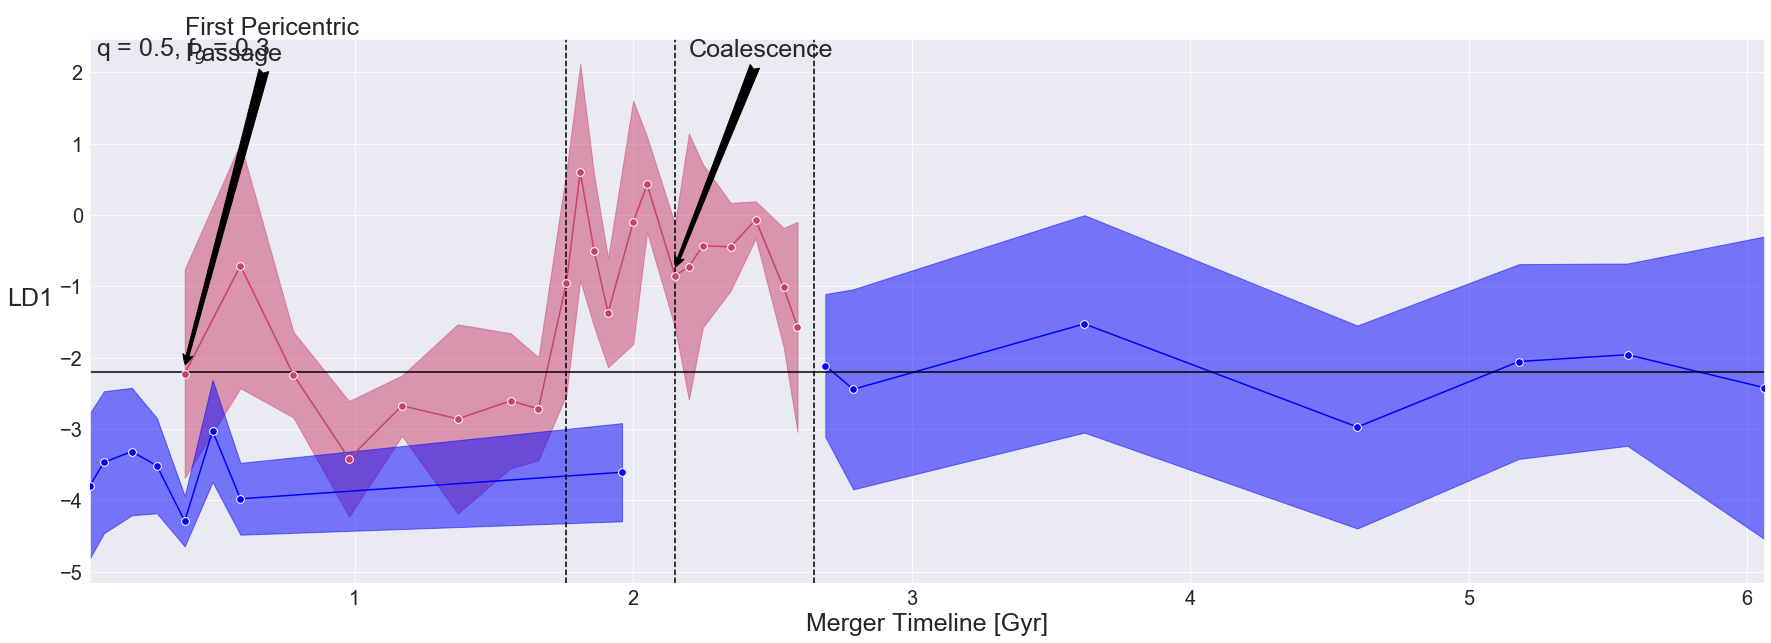

In [91]:
''''
~~~
Separate major merger and minor merger runs
~~~
'''

    

list_runs=['fg3_m12_center', 'fg1_m13_rebin','fg3_m13_rebin', 'fg3_m15_rebin', 'fg3_m1_10_rebin','major_all_rebin','minor_all_rebin']
#list_runs=['fg3_m12_highz']
#list_runs=['fg3_m1_10_rebin']#,'fg3_m15']
#list_runs=['minor_all']

colors=[sns.xkcd_rgb["red"],sns.xkcd_rgb["amber"],sns.xkcd_rgb["orange pink"],sns.xkcd_rgb["baby purple"],sns.xkcd_rgb["purple"],sns.xkcd_rgb["reddish orange"],sns.xkcd_rgb["rich purple"]]
names=['q0.5_fg0.3','q0.333_fg0.1','q0.333_fg0.3','q0.2_fg0.3_BT0.2','q0.1_fg0.3_BT0.2','Major Mergers','Minor Mergers']

priors_list=[[0.9,0.1],[0.9,0.1],[0.9,0.1],[0.7,0.3],[0.7,0.3],[0.9,0.1],[0.7,0.3]]

'''list_runs=['all']
colors=[sns.xkcd_rgb["aqua blue"]]
names=['All Combined']
priors_list=[[0.75,0.25]]'''

list_runs=['major_all','minor_all','fg3_m1_10','fg3_m13','fg3_m12','fg3_m15','fg1_m13']
#sns.xkcd_rgb["aqua"],sns.xkcd_rgb["grass green"],sns.xkcd_rgb["dark pink"],sns.xkcd_rgb["greenish blue"]
colors=[sns.xkcd_rgb["dark pink"],sns.xkcd_rgb["greenish blue"],sns.xkcd_rgb["aqua"],sns.xkcd_rgb["orange pink"],sns.xkcd_rgb["red"],sns.xkcd_rgb["grass green"],sns.xkcd_rgb["amber"]]
names=['Major Mergers', 'Minor Mergers','q0.1_fg0.3_BT0.2','q0.333_fg0.3','q0.5_fg0.3','q0.2_fg0.3_BT0.2','q0.333_fg0.1']

priors_list=[[0.9,0.1],[0.7,0.3],[0.7,0.3],[0.9,0.1],[0.9,0.1],[0.7,0.3],[0.9,0.1]]
#priors_list=[[0.5,0.5],[0.5,0.5],[0.5,0.5],[0.5,0.5],[0.5,0.5],[0.5,0.5],[0.5,0.5]]


list_runs=['fg3_m12_degraded_rot', 'fg3_m12_degraded_rot_noagn']
#sns.xkcd_rgb["aqua"],sns.xkcd_rgb["grass green"],sns.xkcd_rgb["dark pink"],sns.xkcd_rgb["greenish blue"]
colors=[sns.xkcd_rgb["red"],sns.xkcd_rgb["dark pink"]]
names=['q0.5_fg0.3','q0.3_fg0.3_noagn']

priors_list=[[0.9,0.1],[0.9,0.1]]
vers_list=['','']
images=''

plt.clf()
missclass_list=[]


LDA_time=[]
myr_total=[]


num_comps_list=[]
missclass_list_1=[]
missclass_list_1_e=[]
min_comps_list=[]
min_A_list=[]

dPA_means_all=[]
va_means_all=[]
color_means_all=[]
sa_means_all=[]
resids_means_all=[]
lambdar_means_all=[]
epsilon_means_all=[]

A2_means_all=[]
deltapos_means_all=[]
deltapos2_means_all=[]

dPA_means_all_non=[]
va_means_all_non=[]
color_means_all_non=[]
sa_means_all_non=[]
resids_means_all_non=[]
lambdar_means_all_non=[]
epsilon_means_all_non=[]

A2_means_all_non=[]
deltapos_means_all_non=[]
deltapos2_means_all_non=[]

for i in range(len(list_runs)):
    #i=i+5
    add_on=list_runs[i]
    
    vers = vers_list[i]
    
    
        
    run=list_runs[i]

    df = pd.io.parsers.read_table(
        filepath_or_buffer='../LDA_input_tables/LDA_kin_'+str(vers)+str(images)+str(run)+'.txt',#'_view_all.txt',#filepath_or_buffer='LDA_img_ratio_'+str(run)+'_early_late_all_things.txt',#'_view_all.txt',
        header=[0],
        sep='\t'
        )
    
    
    #df.columns = [l for i,l in sorted(feature_dict.items())] + ['Shape Asymmetry']

    df.dropna(how="all", inplace=True) # to drop the empty line at file-end


    for j in range(len(df)):
        if df[['Myr']].values[j][0]<0.39:#df[['Myr']].values[i][0]
            df.set_value(j,'class label',0)
        if add_on[:7]=='fg3_m12' and (df[['Myr']].values[j][0]-2.15) > 0.5:#0.39+0.1:#was 0.39
            df.set_value(j,'class label',0)
        if add_on[:7]=='fg1_m13' and (df[['Myr']].values[j][0]-2.74) > 0.5:#2.74-2.25+2.74:#was 0.39
            df.set_value(j,'class label',0)
        if add_on[:7]=='fg3_m13' and (df[['Myr']].values[j][0]-2.59) > 0.5:#2.64+0.5
            df.set_value(j,'class label',0)
        if add_on[:7]=='fg3_m15' and (df[['Myr']].values[j][0]-3.72) > 0.5:
            df.set_value(j,'class label',0)
        if add_on[:9]=='fg3_m1_10' and (df[['Myr']].values[j][0]-9.17) > 0.5:
            df.set_value(j,'class label',0)
        if add_on[:9]=='major_all':
            #then sort by image name
            if df[['Image']].values[j][0][:7]=='fg3_m12' and (df[['Myr']].values[j][0]-2.15) > 0.5:#q0.5_fg0.3
                df.set_value(j,'class label',0)
            if df[['Image']].values[j][0][:7]=='fg1_m13' and (df[['Myr']].values[j][0]-2.59) > 0.5:
                df.set_value(j,'class label',0)
            if df[['Image']].values[j][0][:7]=='fg3_m13' and (df[['Myr']].values[j][0]-2.74) > 0.5:
                df.set_value(j,'class label',0)
        if add_on[:9]=='minor_all':
            #then sort by image name
            if df[['Image']].values[j][0][:7]=='fg3_m15' and (df[['Myr']].values[j][0]-3.72) > 0.5:
                df.set_value(j,'class label',0)
            if df[['Image']].values[j][0][:7]=='fg3_m10' and (df[['Myr']].values[j][0]-9.17) > 0.5:
                df.set_value(j,'class label',0)
            
      

    myr=[]
    myr_non=[]
    for j in range(len(df)):
        if df[['class label']].values[j][0]==0.0:
            myr_non.append(df[['Myr']].values[j][0])
        else:
            myr.append(df[['Myr']].values[j][0])

    myr_non=sorted(list(set(myr_non)))
    myr=sorted(list(set(myr)))



    print('myr', myr)
    print('myr_non', myr_non)
        
    
    
    
    df.dropna(inplace=True) # to drop the empty line at file-end
    

    
    
    df['dPA*va'] = df.apply(dPA_va,axis=1)
    df['dPA*sa'] = df.apply(dPA_sa,axis=1)
    df['dPA*resids'] = df.apply(dPA_resids,axis=1)
    df['dPA*lambdar'] = df.apply(dPA_lambdar,axis=1)
    df['dPA*epsilon'] = df.apply(dPA_epsilon,axis=1)
    df['dPA*A2'] = df.apply(dPA_A2,axis=1)
    df['dPA*deltapos'] = df.apply(dPA_deltapos,axis=1)
    df['dPA*deltapos2'] = df.apply(dPA_deltapos2,axis=1)
    
    df['va*sa'] = df.apply(va_sa,axis=1)
    df['va*resids'] = df.apply(va_resids,axis=1)
    df['va*lambdar'] = df.apply(va_lambdar,axis=1)
    df['va*epsilon'] = df.apply(va_epsilon,axis=1)
    df['va*A2'] = df.apply(va_A2,axis=1)
    df['va*deltapos'] = df.apply(va_deltapos,axis=1)
    df['va*deltapos2'] = df.apply(va_deltapos2,axis=1)
    
    
    df['sa*resids'] = df.apply(sa_resids,axis=1)
    df['sa*lambdar'] = df.apply(sa_lambdar,axis=1)
    df['sa*epsilon'] = df.apply(sa_epsilon,axis=1)
    df['sa*A2'] = df.apply(sa_A2,axis=1)
    df['sa*deltapos'] = df.apply(sa_deltapos,axis=1)
    df['sa*deltapos2'] = df.apply(sa_deltapos2,axis=1)
    
    
    df['resids*lambdar'] = df.apply(resids_lambdar,axis=1)
    df['resids*epsilon'] = df.apply(resids_epsilon,axis=1)
    df['resids*A2'] = df.apply(resids_A2,axis=1)
    df['resids*deltapos'] = df.apply(resids_deltapos,axis=1)
    df['resids*deltapos2'] = df.apply(resids_deltapos2,axis=1)
    
    
    df['lambdar*epsilon'] = df.apply(lambdar_epsilon,axis=1)
    df['lambdar*A2'] = df.apply(lambdar_A2,axis=1)
    df['lambdar*deltapos'] = df.apply(lambdar_deltapos,axis=1)
    df['lambdar*deltapos2'] = df.apply(lambdar_deltapos2,axis=1)
    
    
    df['epsilon*A2'] = df.apply(epsilon_A2,axis=1)
    df['epsilon*deltapos'] = df.apply(epsilon_deltapos,axis=1)
    df['epsilon*deltapos2'] = df.apply(epsilon_deltapos2,axis=1)
    
    df['A2*deltapos'] = df.apply(A2_deltapos,axis=1)
    df['A2*deltapos2'] = df.apply(A2_deltapos2,axis=1)
    
    df['deltapos*deltapos2'] = df.apply(deltapos_deltapos2,axis=1)
    
    


    
    
    
    '''First, do a bunch of diagnostic plotting :)'''
    X= df[['Delta PA','v_asym','s_asym', 'resids','lambda_r', 'epsilon','A_2','deltapos','deltapos2']].values
    
    
    dPA = {key:[] for key in myr}
    va = {key:[] for key in myr}
    sa = {key:[] for key in myr}
    resids = {key:[] for key in myr}
    lambdar = {key:[] for key in myr}
    epsilon = {key:[] for key in myr}
    A2 = {key:[] for key in myr}
    deltapos = {key:[] for key in myr}
    deltapos2 = {key:[] for key in myr}
    
    
    
    dPA_std = {key:[] for key in myr}
    va_std = {key:[] for key in myr}
    sa_std = {key:[] for key in myr}
    resids_std = {key:[] for key in myr}
    lambdar_std = {key:[] for key in myr}
    epsilon_std = {key:[] for key in myr}
    A2_std = {key:[] for key in myr}
    deltapos_std = {key:[] for key in myr}
    deltapos2_std = {key:[] for key in myr}
    

    dPA_non = {key:[] for key in myr_non}
    va_non = {key:[] for key in myr_non}
    sa_non = {key:[] for key in myr_non}
    resids_non = {key:[] for key in myr_non}
    lambdar_non = {key:[] for key in myr_non}
    epsilon_non = {key:[] for key in myr_non}
    A2_non = {key:[] for key in myr_non}
    deltapos_non = {key:[] for key in myr_non}
    deltapos2_non = {key:[] for key in myr_non}

    
        
    color_name_non = {key:[] for key in myr_non}
    color_name = {key:[] for key in myr}
    
    marker_name_non = {key:[] for key in myr_non}
    marker_name = {key:[] for key in myr}


    epsilon_all=[]
    epsilon_all_non=[]
    vasym_all=[]
    vasym_all_non=[]
    
    for l in range(len(df)):
        if df[['class label']].values[l]==0:
            
            epsilon_all_non.append(X[l,5])
            vasym_all_non.append(X[l,1])
            
            dPA_non[df[['Myr']].values[l][0]].append(X[l,0])
            va_non[df[['Myr']].values[l][0]].append(X[l,1])
            sa_non[df[['Myr']].values[l][0]].append(X[l,2])
            resids_non[df[['Myr']].values[l][0]].append(X[l,3])
            lambdar_non[df[['Myr']].values[l][0]].append(X[l,4])
            epsilon_non[df[['Myr']].values[l][0]].append(X[l,5])
            A2_non[df[['Myr']].values[l][0]].append(X[l,6])
            deltapos_non[df[['Myr']].values[l][0]].append(X[l,7])
            deltapos2_non[df[['Myr']].values[l][0]].append(X[l,8])
            
            
            #color_non[df[['Myr']].values[l][0]].append(df[['']])
            #print('concentration here', df[['Concentration (C)']].values[i][0])
        else:
            epsilon_all.append(X[l,5])
            vasym_all.append(X[l,1])
            
            dPA[df[['Myr']].values[l][0]].append(X[l,0])
            va[df[['Myr']].values[l][0]].append(X[l,1])
            sa[df[['Myr']].values[l][0]].append(X[l,2])
            resids[df[['Myr']].values[l][0]].append(X[l,3])
            lambdar[df[['Myr']].values[l][0]].append(X[l,4])
            epsilon[df[['Myr']].values[l][0]].append(X[l,5])
            A2[df[['Myr']].values[l][0]].append(X[l,6])
            deltapos[df[['Myr']].values[l][0]].append(X[l,7])
            deltapos2[df[['Myr']].values[l][0]].append(X[l,8])
            

  
    

    
    
    
    '''Now I would love to run some OLS to find R^2 values etc'''
    from sklearn import datasets, linear_model, feature_selection
    from sklearn.metrics import mean_squared_error, r2_score
    from sklearn.model_selection import train_test_split
    
    
    
    
    
    y = df['class label'].values
    
    
    X= df[['Delta PA','v_asym','s_asym', 'resids','lambda_r', 'epsilon','A','A_2','deltapos','deltapos2']].values
    #std_scale = preprocessing.StandardScaler().fit(X)
    #X = std_scale.transform(X)

    enc = LabelEncoder()
    label_encoder = enc.fit(y)
    y = label_encoder.transform(y) + 1
    label_dict = {1: 'Nonmerger', 2: 'Merger'}




    
    
    #X= df[['Delta PA','s_asym', 'resids','lambda_r', 'epsilon','A_2']].values
    
    y = df['class label'].values
    
    
    
    
    enc = LabelEncoder()
    label_encoder = enc.fit(y)
    y = label_encoder.transform(y)


    
    
    
     

    
    
    '''Make the beautiful list of colors'''
    # These are the "Tableau 20" colors as RGB.    
    tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
                 (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
                 (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
                 (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
                 (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    

    # Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
    for k in range(len(tableau20)):    
        r, g, b = tableau20[k]    
        tableau20[k] = (r / 255., g / 255., b / 255.)    


    
    import seaborn
    sns.set_style("darkgrid")
    
 
    
    
    ct_1=['Delta PA','Delta PA','Delta PA','Delta PA','Delta PA','Delta PA','Delta PA','Delta PA',
          'v_asym','v_asym','v_asym','v_asym','v_asym','v_asym','v_asym',
      's_asym','s_asym','s_asym','s_asym','s_asym','s_asym',
      'resids','resids','resids','resids','resids',
      'lambda_r','lambda_r','lambda_r','lambda_r',
         'epsilon','epsilon','epsilon',
         'A_2','A_2',
         'deltapos']
    ct_2=['v_asym','s_asym','resids','lambda_r','epsilon','A_2','deltapos','deltapos2',
      's_asym','resids','lambda_r','epsilon','A_2','deltapos','deltapos2',
      'resids','lambda_r','epsilon','A_2','deltapos','deltapos2',
      'lambda_r','epsilon','A_2','deltapos','deltapos2',
        'epsilon', 'A_2','deltapos','deltapos2',
         'A_2','deltapos','deltapos2',
         'deltapos','deltapos2',
         'deltapos2']
    term=['dPA*va','dPA*sa','dPA*resids','dPA*lambdar','dPA*epsilon','dPA*A2','dPA*deltapos','dPA*deltapos2',
            'va*resids','va*resids','va*lambdar','va*epsilon','va*A2','va*deltapos','va*deltapos2',
          'sa*resids','sa*lambdar','sa*epsilon','sa*A2','sa*deltapos','sa*deltapos2',
           'resids*lambdar','resids*epsilon','resids*A2','resids*deltapos','resids*deltapos2',
           'lambdar*epsilon','lambdar*A2','lambdar*deltapos','lambdar*deltapos2',
           'epsilon*A2','epsilon*deltapos','epsilon*deltapos2',
         'A2*deltapos','A2*deltapos2',
         'deltapos*deltapos2']

    
    
    
    inputs=['Delta PA','v_asym','s_asym','resids','lambda_r','epsilon','A_2','deltapos','deltapos2',
            'dPA*va','dPA*sa','dPA*resids','dPA*lambdar','dPA*epsilon','dPA*A2','dPA*deltapos','dPA*deltapos2',
            'va*sa','va*resids','va*lambdar','va*epsilon','va*A2','va*deltapos','va*deltapos2',
            'sa*resids','sa*lambdar','sa*epsilon','sa*A2','sa*deltapos','sa*deltapos2',
           'resids*lambdar','resids*epsilon','resids*A2','resids*deltapos','resids*deltapos2',
           'lambdar*epsilon','lambdar*A2','lambdar*deltapos','lambdar*deltapos2',
           'epsilon*A2','epsilon*deltapos','epsilon*deltapos2',
           'A2*deltapos','A2*deltapos2',
           'deltapos*deltapos2']
    
    
    
    OG_length=len(inputs)
    
    prev_input=[]
    prev_input_here=[]
    missclass=[]
    missclass_e=[]
    num_comps=[]
    list_coef=[]
    list_coef_std=[]
    list_inter=[]
    list_inter_std=[]
    list_master=[]
    list_master_confusion=[]
    list_classes=[]
    kf_choose=[]
    
    
    kf = StratifiedKFold(n_splits=10, random_state=True, shuffle=True)
    
    for o in range(len(inputs)):#len(inputs)-20):
    
        coef_mean=[]
        coef_std=[]
        inter_mean=[]
        inter_std=[]
        coef_mean_std=[]
        accuracy=[]
        accuracy_e=[]
        inputs_this_step=[]
        confusion_master_this_step=[]
        master_this_step=[]
        classes_this_step=[]
        score_ANN=[]
        kf_list=[]
        


        #Now inputs is changing and you need to go through and choose a variable
        for k in range(len(inputs)):#Search through every one
            
            prev_input.append(inputs[k])
            inputs_here=[]
            inputs_here.append(inputs[k])
            
            #print('starting input', prev_input,inputs[k])
            #if inputs[k] is a cross term and the prev_input doesn't contain it, add it:
            for m in range(len(term)):
                if inputs[k]==term[m]:
                    #then you are going to search every term of prev_input and see if it is there
                    #for n in range(len(prev_input)):
                    if ct_1[m] not in prev_input:
                        prev_input.append(ct_1[m])
                        
                        inputs_here.append(ct_1[m])
                    if ct_2[m] not in prev_input:
                        prev_input.append(ct_2[m])
                        inputs_here.append(ct_2[m])
                        
                    
            #print('inputs heading into LDA',prev_input)
            
            X = df[prev_input].values
            
            
            




            y = df['class label'].values

            from sklearn import preprocessing



            std_scale = preprocessing.StandardScaler().fit(X)
            X = std_scale.transform(X)


            enc = LabelEncoder()
            label_encoder = enc.fit(y)
            y = label_encoder.transform(y) + 1


            label_dict = {1: 'NonMerger', 2: 'Merger'}
            from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

            # LDA
            sklearn_lda = LDA(priors=priors_list[i], store_covariance=True)#store_covariance=False


            X_lda_sklearn = sklearn_lda.fit_transform(X, y)

            dec = sklearn_lda.score(X,y)
            prob = sklearn_lda.predict_proba(X)

            coef = sklearn_lda.coef_





            
    
            kf.get_n_splits(X, y)
            kf_list.append(kf.split(X,y))



            coef_list=[]
            inter_list=[]
            classes_list=[]
            confusion_master=[]
            y_test_master=[]
            pred_master=[]
            single_prediction=[]
            score=[]
            count=0
            for train_index, test_index in kf.split(X, y):

                X_train, X_test = X[train_index], X[test_index]
                y_train, y_test = y[train_index], y[test_index]
                
                
                
                



                sklearn_lda = LDA( priors=priors_list[i],store_covariance=True)#store_covariance=False
            


                X_lda_sklearn = sklearn_lda.fit_transform(X_train, y_train)
                coef = sklearn_lda.coef_
                inter = sklearn_lda.intercept_

                inter_list.append(inter)
                coef_list.append(coef)
                inter_list.append(inter)
                pred =sklearn_lda.predict(X_test)
                classes_list.append(sklearn_lda.classes_)
                confusion_master.append(confusion_matrix(pred,y_test))

                single_prediction.append(confusion_matrix(pred,y_test)[1][0]+confusion_matrix(pred,y_test)[0][1])



            score_ANN.append(np.mean(score))
            accuracy.append(np.mean(single_prediction))#/(master[0][0]+master[1][0]+master[0][1]+master[1][1]))
            
            accuracy_e.append(np.std(single_prediction))
            inputs_this_step.append(np.array(prev_input))
            
            confusion_master_this_step.append(np.array((np.mean(confusion_master,axis=0)/np.sum(np.mean(confusion_master,axis=0))).transpose()))
            master_this_step.append(np.array(np.mean(confusion_master, axis=0).transpose()))
            #print('appending with this', np.array(prev_input))
            
            classes_this_step.append(np.array(classes_list))
    
            
            coef_mean.append(np.mean(coef_list, axis=0))
            coef_std.append(np.std(coef_list, axis=0))
            
            inter_mean.append(np.mean(inter_list, axis=0))
            inter_std.append(np.std(inter_list, axis=0))
            
            #prev_input.remove(new_stuff)
            for m in range(len(inputs_here)):
                try:
                    prev_input.remove(inputs_here[m])
                except ValueError:
                    continue
        
        try:
            if accuracy_e[accuracy.index(min(accuracy))]<0.00001:
                break
        except ValueError:
            continue
        #print('all of inputs', inputs_this_step)
        #print('selecting the best model for this step', (inputs_this_step[accuracy.index(min(accuracy))]))
        
        thing=(inputs_this_step[accuracy.index(min(accuracy))])
        first_A=min(accuracy)
        
        prev_input_here.append(thing)
        
        for m in range(len(thing)):
            
            prev_input.append(thing[m])
            
            try:
                
                inputs.remove(thing[m])
            except ValueError:
                #print('~~~RUning into troubles')
                #print('inputs', inputs)
                #print('the thing to remove', thing[m])
                continue
        #print('the input now', inputs)
        #STOP
        prev_input=list(set(prev_input))
        missclass.append(min(accuracy))
        #print('coef previous to selecting min', coef_mean)
        missclass_e.append(accuracy_e[accuracy.index(min(accuracy))])
        
        kf_choose.append(kf_list[accuracy.index(min(accuracy))])
        
        list_coef.append(coef_mean[accuracy.index(min(accuracy))])
        #print('coef list', coef_mean[accuracy.index(min(accuracy))])
        list_coef_std.append(coef_std[accuracy.index(min(accuracy))])
        
        list_inter.append(inter_mean[accuracy.index(min(accuracy))])
        list_inter_std.append(inter_std[accuracy.index(min(accuracy))])
        
        list_master.append(master_this_step[accuracy.index(min(accuracy))])
        list_master_confusion.append(confusion_master_this_step[accuracy.index(min(accuracy))])
        
        list_classes.append(classes_this_step[accuracy.index(min(accuracy))])
        
        #list_score.append(score_ANN[accuracy.index(min(accuracy))])
        
        num_comps.append(len(prev_input))#
        #print('min index', accuracy.index(min(accuracy)))
        #if OG_length < len(:
        #    break
        
        if len(thing)==28:
            break
        
    #print('these are your inputs',prev_input, prev_input_here)
    
    
    #list_coef=[]
    #list_coef_std=[]
    
    min_A=min(missclass)
    min_comps=num_comps[missclass.index(min(missclass))]
    for p in range(len(missclass)):
        missclass_list.append(missclass[p])
    
    min_index=locate_min(missclass)[1][0]
    
    
    min_A=missclass[locate_min(missclass)[1][0]]
    min_A_e=missclass_e[locate_min(missclass)[1][0]]
    '''Now you need to use one standard error '''
    
    
    for m in range(len(missclass)):
        if (missclass[m]) < (min_A+min_A_e):
            print('m',missclass[m],min_A+min_A_e)
            new_min_index=m
            break
        else:
            new_min_index=min_index
            
    min_A=missclass[new_min_index]
    min_A_e=missclass_e[new_min_index]
    min_comps=num_comps[new_min_index]
    inputs_all=prev_input_here[new_min_index]#:new_min_index+1]
    
    splits=kf_choose[new_min_index]
    
    X= df[['Delta PA','v_asym','s_asym', 'resids','lambda_r', 'epsilon','A','A_2','deltapos','deltapos2']].values
    
    y = df['class label'].values

    from sklearn import preprocessing

    #print(prev_input)
    print('terms before adding in necessary', inputs_all)
    print(run,'&')
    print('coefficients', list_coef[new_min_index])
    print('coefficient std', list_coef_std[new_min_index])
    
    # There has got to be a better way to write this that involves listing them in order of importance
    inds = abs(list_coef[new_min_index][0]).argsort()
    sortedinput = inputs_all[inds]
    print('sorted inputs', sortedinput)
    print('coeff', list_coef[new_min_index][0][inds])
    print('std', list_coef_std[new_min_index][0][inds])
    
    
    
    
    # We have to figure out how many terms to include
    significant_term = []
    significant_coef = []
    significant_std = []
    for l in range(len(sortedinput)):
        if float(abs(list_coef[new_min_index][0][inds][l]) - 3*list_coef_std[new_min_index][0][inds][l]) > 0:
            #then it is still significant to 3. sigma
            significant_term.append(sortedinput[l])
            significant_coef.append(list_coef[new_min_index][0][inds][l])
            significant_std.append(list_coef_std[new_min_index][0][inds][l])
    # this next section is entirely for the interactive plot:
    print(significant_term, significant_coef, significant_std)
    print('reversed list?', significant_term[::-1])
    X = df[significant_term[::-1]].values

    std_scale = preprocessing.StandardScaler().fit(X)
    
    X = std_scale.transform(X)
    
    # These are all the. variables scaled
    # So now go through and. build a bunch of arrays that contain the value of these for all viewpoints?
    
    input_1 = {key:[] for key in myr}
    input_2 = {key:[] for key in myr}
    input_3 = {key:[] for key in myr}
    input_4 = {key:[] for key in myr}
    input_5 = {key:[] for key in myr}
    input_6 = {key:[] for key in myr}
    input_7 = {key:[] for key in myr}
    input_8 = {key:[] for key in myr}
    input_9 = {key:[] for key in myr}
    
      
    
    
    

    input_1_non = {key:[] for key in myr_non}
    input_2_non = {key:[] for key in myr_non}
    input_3_non = {key:[] for key in myr_non}
        
    
    for l in range(len(df)):
        if df[['class label']].values[l]==0:
            
            
            input_1_non[df[['Myr']].values[l][0]].append(X[l,0])
            input_2_non[df[['Myr']].values[l][0]].append(X[l,1])
            input_3_non[df[['Myr']].values[l][0]].append(X[l,2])
        else:
            
            try:
                input_1[df[['Myr']].values[l][0]].append(X[l,0])
                input_2[df[['Myr']].values[l][0]].append(X[l,1])
                input_3[df[['Myr']].values[l][0]].append(X[l,2])
                input_4[df[['Myr']].values[l][0]].append(X[l,3])
                input_5[df[['Myr']].values[l][0]].append(X[l,4])
                input_6[df[['Myr']].values[l][0]].append(X[l,5])
            except IndexError:
                continue
                
    
    input_1_means=[]
    input_2_means=[]
    input_3_means=[]
    input_4_means=[]
    input_5_means=[]
    input_6_means=[]
    
    for k in range(len(input_1)):
        input_1_list_all=[]
        input_2_list_all=[]
        input_3_list_all=[]
        input_4_list_all=[]
        input_5_list_all=[]
        input_6_list_all=[]
        
        for z in range(len(input_1[myr[k]])):
            try:
                input_1_list_all.append((input_1[myr[k]][z]))
                input_2_list_all.append((input_2[myr[k]][z]))
                input_3_list_all.append((input_3[myr[k]][z]))
                input_4_list_all.append((input_4[myr[k]][z]))
                input_5_list_all.append((input_5[myr[k]][z]))
                input_6_list_all.append((input_6[myr[k]][z]))
            except IndexError:
                continue
            
        input_1_means.append(np.mean(input_1_list_all))
        input_2_means.append(np.mean(input_2_list_all))
        input_3_means.append(np.mean(input_3_list_all))
        input_4_means.append(np.mean(input_4_list_all))
        input_5_means.append(np.mean(input_5_list_all))
        input_6_means.append(np.mean(input_6_list_all))
        
        
    
    
    print('means', input_1_means)
    print(input_2_means)
    print(input_3_means)
   
    
    
   
    
   
    
    '''write a nice thing to output in the proper format'''
    dPA_c='--'
    v_asym_c='--'
    s_asym_c='--'
    resids_c='--'
    lambdar_c='--'
    epsilon_c='--'
    A2_c='--'
    deltapos_c='--'
    deltapos2_c='--'
    
    dPA_v_asym_c='--'
    dPA_s_asym_c='--'
    dPA_resids_c='--'
    dPA_lambdar_c='--'
    dPA_epsilon_c='--'
    dPA_A2_c='--'
    dPA_deltapos_c='--'
    dPA_deltapos2_c='--'
    
    v_asym_s_asym_c='--'
    v_asym_resids_c='--'
    v_asym_lambdar_c='--'
    v_asym_epsilon_c='--'
    v_asym_A2_c='--'
    v_asym_deltapos_c='--'
    v_asym_deltapos2_c='--'
    
    s_asym_resids_c='--'
    s_asym_lambdar_c='--'
    s_asym_epsilon_c='--'
    s_asym_A2_c='--'
    s_asym_deltapos_c='--'
    s_asym_deltapos2_c='--'
    
    resids_lambdar_c='--'
    resids_epsilon_c='--'
    resids_A2_c='--'
    resids_deltapos_c='--'
    resids_deltapos2_c='--'
    
    lambdar_epsilon_c='--'
    lambdar_A2_c='--'
    lambdar_deltapos_c='--'
    lambdar_deltapos2_c='--'
    
    epsilon_A2_c='--'
    epsilon_deltapos_c='--'
    epsilon_deltapos2_c='--'
    
    A2_deltapos_c='--'
    A2_deltapos2_c='--'
    
    deltapos_deltapos2_c='--'
    
    
    for p in range(len(prev_input_here[new_min_index])):
        
        if str(prev_input_here[new_min_index][p])=='Delta PA':
            dPA_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        if str(prev_input_here[new_min_index][p])=='v_asym':
            v_asym_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        if str(prev_input_here[new_min_index][p])=='s_asym':
            s_asym_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        if str(prev_input_here[new_min_index][p])=='resids':
            resids_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        if str(prev_input_here[new_min_index][p])=='lambda_r':
            lambdar_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        if str(prev_input_here[new_min_index][p])=='epsilon':
            epsilon_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        if str(prev_input_here[new_min_index][p])=='A_2':
            A2_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        if str(prev_input_here[new_min_index][p])=='deltapos':
            deltapos_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        if str(prev_input_here[new_min_index][p])=='deltapos2':
            deltapos2_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        
        if str(prev_input_here[new_min_index][p])=='dPA*va':
            dPA_v_asym_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='dPA*sa':
            dPA_s_asym_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='dPA*resids':
            dPA_resids_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='dPA*lambdar':
            dPA_lambdar_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='dPA*epsilon':
            dPA_epsilon_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='dPA*A2':
            dPA_A2_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='dPA*deltapos':
            dPA_deltapos_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='dPA*deltapos2':
            dPA_deltapos2_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        if str(prev_input_here[new_min_index][p])=='va*sa':
            v_asym_s_asym_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='va*resids':
            v_asym_resids_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='va*lambdar':
            v_asym_lambdar_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='va*epsilon':
            v_asym_epsilon_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='va*A2':
            v_asym_A2_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='va*deltapos':
            v_asym_deltapos_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='va*deltapos2':
            v_asym_deltapos2_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        
        if str(prev_input_here[new_min_index][p])=='sa*resids':
            s_asym_resids_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='sa*lambdar':
            s_asym_lambdar_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='sa*epsilon':
            s_asym_epsilon_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='sa*A2':
            s_asym_A2_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='sa*deltapos':
            s_asym_deltapos_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='sa*deltapos2':
            s_asym_deltapos2_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        if str(prev_input_here[new_min_index][p])=='resids*lambdar':
            resids_lambdar_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='resids*epsilon':
            resids_epsilon_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='resids*A2':
            resids_A2_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='resids*deltapos':
            resids_deltapos_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='resids*deltapos2':
            resids_deltapos2_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        if str(prev_input_here[new_min_index][p])=='lambdar*epsilon':
            lambdar_epsilon_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='lambdar*A2':
            lambdar_A2_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='lambdar*deltapos':
            lambdar_deltapos_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='lambdar*deltapos2':
            lambdar_deltapos2_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        
        if str(prev_input_here[new_min_index][p])=='epsilon*A2':
            epsilon_A2_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='epsilon*deltapos':
            epsilon_deltapos_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='epsilon*deltapos2':
            epsilon_deltapos2_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        if str(prev_input_here[new_min_index][p])=='A2*deltapos':
            A2_deltapos_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='A2*deltapos2':
            A2_deltapos2_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        if str(prev_input_here[new_min_index][p])=='deltapos*deltapos2':
            deltapos_deltapos2_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        
        
    print('~~~~~')
    print(str(run)+' & '+dPA_c+' & '+v_asym_c+' & '+s_asym_c+' & '+resids_c+' & '+lambdar_c+' & '+epsilon_c+' & '+A2_c+' & '+deltapos_c+' & '+deltapos2_c+' & '+'\\'+'textbf{'+str(round(list_inter[new_min_index][0],2))+' $\pm$ '+str(round(list_inter_std[new_min_index][0],2))+'}'+'\\'+'\\')
        
    print(str(run)+' & '+dPA_v_asym_c+' & '+dPA_s_asym_c+' & '+dPA_resids_c+' & '+dPA_lambdar_c+' & '+dPA_epsilon_c+' & '+dPA_A2_c+' & '+dPA_deltapos_c+' & '+dPA_deltapos2_c+'\\'+'\\')
    
    print(str(run)+' & '+v_asym_s_asym_c+' & '+v_asym_resids_c+' & '+v_asym_lambdar_c+' & '+v_asym_epsilon_c+' & '+v_asym_A2_c+' & '+v_asym_deltapos_c+' & '+v_asym_deltapos2_c+'\\'+'\\')
    
    
    print(str(run)+' & '+s_asym_resids_c+' & '+s_asym_lambdar_c+' & '+s_asym_epsilon_c+' & '+s_asym_A2_c+' & '+s_asym_deltapos_c+' & '+s_asym_deltapos2_c+'\\'+'\\')
    print(str(run)+' & '+resids_lambdar_c+' & '+resids_epsilon_c+' & '+resids_A2_c+' & '+resids_deltapos_c+' & '+resids_deltapos2_c+' & '+lambdar_epsilon_c+' & '+lambdar_A2_c+' & '+lambdar_deltapos_c+' & '+lambdar_deltapos2_c+' & '+epsilon_A2_c+' & '+epsilon_deltapos_c+' & '+epsilon_deltapos2_c+' & '+A2_deltapos_c+' & '+A2_deltapos2_c+' & '+deltapos_deltapos2_c+'\\'+'\\')
    
    
    print('~~~~~')
    
    
    
    
    
    
    print('intercept', list_inter[new_min_index])
    print('intercept std', list_inter_std[new_min_index])
    
    
    
    sns.set_style("darkgrid")
    
    master=list_master[new_min_index]
    
    print('~~~Accuracy~~~')
    print((master[1][1]+master[0][0])/(master[0][0]+master[1][0]+master[0][1]+master[1][1]))
    print('~~~Precision~~~')
    print(master[1][1]/(master[0][1]+master[1][1]))#TP/(TP+FP)
    print('~~~Recall~~~')
    print(master[1][1]/(master[1][0]+master[1][1]))#TP/(TP+FN)
    print('~~~F1~~~')
    print((2*master[1][1])/(master[0][1]+master[1][0]+2*master[1][1]))#2TP/(2TP+FP+FN)
    
    X = df[inputs_all].values
    y = df['class label'].values
    std_scale = preprocessing.StandardScaler().fit(X)
    X = std_scale.transform(X)


    enc = LabelEncoder()
    label_encoder = enc.fit(y)
    y = label_encoder.transform(y) + 1


    
    X_lda_1=[]
    X_lda_2=[]
    for j in range(len(X)):
        if y[j] ==1:
            X_lda_1.append(np.sum(X[j]*list_coef[new_min_index])+list_inter[new_min_index][0])
        else:
            X_lda_2.append(np.sum(X[j]*list_coef[new_min_index])+list_inter[new_min_index][0])
    input_hist=X_lda_sklearn
    
    
    plt.clf()
    fig = plt.figure(figsize=(20,4))
    ax = fig.add_subplot(111)
    ax.hist(X_lda_1, label='Nonmerger',  color='blue', alpha=0.5,normed=1)
    ax.hist(X_lda_2, label='Merger',  color=colors[i],alpha = 0.5,normed=1)#sns.xkcd_rgb["salmon"]

    

    ax.set_xlabel('LD1', size=30)
    #ax.set_title('Histogram #%s' %str(cnt+1), size=20)

    # hide axis ticks
    ax.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on", labelsize=30)

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    ax.set_ylabel('Relative Count', size=30)
    
    
    plt.legend(loc="upper right", fontsize=30)
    
    
    
    
    xs=[]
    LDA1=[]
    
    my_lists = {key:[] for key in myr}
    my_lists_non = {key:[] for key in myr_non}
    my_lists_none = []
    my_lists_merg = []
    separations = {key:[] for key in myr}

    
    
    for j in range(len(df)):
        if df[['class label']].values[j]==0:
            my_lists_none.append(np.sum(X[j]*list_coef[new_min_index])+list_inter[new_min_index][0])
            my_lists_non[df[['Myr']].values[j][0]].append(np.sum(X[j]*list_coef[new_min_index])+list_inter[new_min_index][0])
            continue
        else:
            my_lists_merg.append(np.sum(X[j]*list_coef[new_min_index])+list_inter[new_min_index][0])
            
            my_lists[df[['Myr']].values[j][0]].append(np.sum(X[j]*list_coef[new_min_index])+list_inter[new_min_index][0])
        
            L=np.sum(X[j]*list_coef[new_min_index])+list_inter[new_min_index][0]
            #df[['Gini']].values[i][0]*coef[0][0]+df[['M20']].values[i][0]*coef[0][1]+df[['Concentration (C)']].values[i][0]*coef[0][2]+df[['Asymmetry (A)']].values[i][0]*coef[0][3]+df[['Clumpiness (S)']].values[i][0]*coef[0][4]+df[['Sersic N']].values[i][0]*coef[0][5]+df[['Shape Asymmetry']].values[i][0]*coef[0][6]
            LDA1.append(L)
            xs.append(df[['Myr']].values[j][0])

    #print(mean(my_lists[180]))
    mean_non=(np.mean(my_lists_merg)+np.mean(my_lists_none))/2
    

    
    
    means=[]
    std=[]
    myr_here=[]
    #print('separations before averaged', separations)
    for j in range(len(myr)):
        
        if np.std(my_lists[myr[j]])==0:# or np.std(my_lists[myr[j]])< 0.01*np.mean(my_lists[myr[j]]):
            continue
        means.append(np.mean(my_lists[myr[j]]))
        std.append(np.std(my_lists[myr[j]]))
        
        myr_here.append(myr[j])
    
    myr_total.append(myr_here[-1]-myr_here[0])
    
    myr_detect_LDA_val=[]
    myr_detect_LDA=[]
    for o in range(len(means)):
        if means[o] > mean_non:#this means above the decision boundary
            myr_detect_LDA.append(o)
            myr_detect_LDA_val.append(myr[o])
    grouped=group_consecutives(myr_detect_LDA)
    
    interval=[]
    for o in range(len(grouped)):
        interval.append(myr_detect_LDA_val[myr_detect_LDA.index(grouped[o][-1])]-myr_detect_LDA_val[myr_detect_LDA.index(grouped[o][0])])
    LDA_time.append(np.sum(interval))
    
    
    means=np.array(means)
    std=np.array(std)
    myr_here=np.array(myr_here)
    
    means_non=[]
    std_non=[]
    myr_here_non=[]
    for j in range(len(myr_non)):
        
        if np.std(my_lists_non[myr_non[j]])==0 or np.std(my_lists_non[myr_non[j]])< 0.01*np.mean(my_lists_non[myr_non[j]]):
            continue
        means_non.append(np.mean(my_lists_non[myr_non[j]]))
        std_non.append(np.std(my_lists_non[myr_non[j]]))
        myr_here_non.append(myr_non[j])
        
    
    means_non=np.array(means_non)
    std_non=np.array(std_non)
    myr_here_non=np.array(myr_here_non)
    
   
    
    xs=[]
    LDA1=[]
    
    my_lists = {key:[] for key in myr}
    
    
    
    
    my_lists_non = {key:[] for key in myr_non}
    my_lists_none = []
    my_lists_merg = []
    separations = {key:[] for key in myr}

    
    
    for j in range(len(df)):
        if df[['class label']].values[j]==0:
            my_lists_none.append(np.sum(X[j]*list_coef[new_min_index])+list_inter[new_min_index][0])
            my_lists_non[df[['Myr']].values[j][0]].append(np.sum(X[j]*list_coef[new_min_index])+list_inter[new_min_index][0])
            
            
            continue
        else:
            my_lists_merg.append(np.sum(X[j]*list_coef[new_min_index])+list_inter[new_min_index][0])
        
            my_lists[df[['Myr']].values[j][0]].append(np.sum(X[j]*list_coef[new_min_index])+list_inter[new_min_index][0])
            L=np.sum(X[j]*list_coef[new_min_index])+list_inter[new_min_index][0]
            #df[['Gini']].values[i][0]*coef[0][0]+df[['M20']].values[i][0]*coef[0][1]+df[['Concentration (C)']].values[i][0]*coef[0][2]+df[['Asymmetry (A)']].values[i][0]*coef[0][3]+df[['Clumpiness (S)']].values[i][0]*coef[0][4]+df[['Sersic N']].values[i][0]*coef[0][5]+df[['Shape Asymmetry']].values[i][0]*coef[0][6]
            LDA1.append(L)
            xs.append(df[['Myr']].values[j][0])

    #print(mean(my_lists[180]))
    mean_non=(np.mean(my_lists_merg)+np.mean(my_lists_none))/2
    
    
    print('DECISION BOUNDARY', mean_non, run)
    
    
    
    means=[]
    std=[]
    myr_here=[]
    
    for j in range(len(myr)):
        
        if np.std(my_lists[myr[j]])==0:# or np.std(my_lists[myr[j]])< 0.01*np.mean(my_lists[myr[j]]):
            continue
        means.append(np.mean(my_lists[myr[j]]))#was just my_lists
        std.append(np.std(my_lists[myr[j]]))
        
   
        
        myr_here.append(myr[j])
    print('myr', myr_here)
    
    myr_total.append(myr_here[-1]-myr_here[0])
    
    myr_detect_LDA_val=[]
    myr_detect_LDA=[]
    for o in range(len(means)):
        if means[o] - std[o] > mean_non:#this means above the decision boundary
            myr_detect_LDA.append(o)
            myr_detect_LDA_val.append(myr[o])
    '''grouped=group_consecutives(myr_detect_LDA)
    print('grouped', grouped)
    interval=[]
    for o in range(len(grouped)):
        interval.append(myr_detect_LDA_val[myr_detect_LDA.index(grouped[o][-1])]-myr_detect_LDA_val[myr_detect_LDA.index(grouped[o][0])])
    #LDA_time.append(np.sum(interval))
    '''
    
    means=np.array(means)
    std=np.array(std)
    myr_here=np.array(myr_here)
    
    means_non=[]
    std_non=[]
    myr_here_non=[]
    
    
    for j in range(len(myr_non)):
        
        if np.std(my_lists_non[myr_non[j]])==0 or np.std(my_lists_non[myr_non[j]])< 0.01*np.mean(my_lists_non[myr_non[j]]):
            continue
        means_non.append(np.mean(my_lists_non[myr_non[j]]))
        std_non.append(np.std(my_lists_non[myr_non[j]]))
        myr_here_non.append(myr_non[j])
        
        

    
    means_non=np.array(means_non)
    std_non=np.array(std_non)
    myr_here_non=np.array(myr_here_non)
    
    
    
    new_means=np.array([x for x in means])
    new_means_non=np.array([x for x in means_non])


    

    myr_here_non_left=[]
    myr_here_non_right=[]
    new_means_non_left=[]
    new_means_non_right=[]
    std_non_left=[]
    std_non_right=[]
    
    

    
    for p in range(len(myr_here_non)):
        if myr_here_non[p] > 2:
            myr_here_non_right.append(myr_here_non[p])
            new_means_non_right.append(new_means_non[p])
            std_non_right.append(std_non[p])
            
            

            
        else:
            myr_here_non_left.append(myr_here_non[p])
            new_means_non_left.append(new_means_non[p])
            std_non_left.append(std_non[p])
            
            
            
            
           
            
            
    myr_here_non_right=np.array(myr_here_non_right)
    myr_here_non_left=np.array(myr_here_non_left)
    new_means_non_right=np.array(new_means_non_right)
    new_means_non_left=np.array(new_means_non_left)
    std_non_right=np.array(std_non_right)
    std_non_left=np.array(std_non_left)
    

    
    
    

    
    

    
    plt.clf()
    fig = plt.figure(figsize=(30,10))
    axes = fig.add_subplot(111)
    
    new_means=np.array([x for x in means])
    new_means_non=np.array([x for x in means_non])


    axes.plot(myr_here, new_means, color=colors[i])
    
    axes.fill_between(myr_here, (new_means-std), (new_means+std),alpha=.5, color=colors[i])
    axes.scatter(myr_here, new_means, color=colors[i], s=60, edgecolor='white', zorder=100)

    myr_here_non_left=[]
    myr_here_non_right=[]
    new_means_non_left=[]
    new_means_non_right=[]
    std_non_left=[]
    std_non_right=[]
    for p in range(len(myr_here_non)):
        if myr_here_non[p] > 2:
            myr_here_non_right.append(myr_here_non[p])
            new_means_non_right.append(new_means_non[p])
            std_non_right.append(std_non[p])
        else:
            myr_here_non_left.append(myr_here_non[p])
            new_means_non_left.append(new_means_non[p])
            std_non_left.append(std_non[p])
            
    myr_here_non_right=np.array(myr_here_non_right)
    myr_here_non_left=np.array(myr_here_non_left)
    new_means_non_right=np.array(new_means_non_right)
    new_means_non_left=np.array(new_means_non_left)
    std_non_right=np.array(std_non_right)
    std_non_left=np.array(std_non_left)
    axes.fill_between(myr_here_non_left, (new_means_non_left-std_non_left), (new_means_non_left+std_non_left),alpha=.5, color='blue')
    axes.fill_between(myr_here_non_right, (new_means_non_right-std_non_right), (new_means_non_right+std_non_right),alpha=.5, color='blue')
    
    
    axes.plot(myr_here_non_right, new_means_non_right, color='blue')
    axes.plot(myr_here_non_left, new_means_non_left, color='blue')
    
    axes.scatter(myr_here_non, new_means_non, color='blue', s=60, edgecolor='white', zorder=100)
    
    axes.set_xlim([min([min(myr_non),min(myr)]),max([max(myr_non),max(myr)])]) 
    
    ymin, ymax = axes.get_ylim()
    if run[:7]=='fg1_m13':
        
        
        #plt.axvline(x=220/100, color='black', ls='--')
        plt.axvline(x=2.25, color='black', ls='--')
        plt.axvline(x=2.74, color='black', ls='--')
        plt.axvline(x=2.74+(0.5), color='black', ls='--')

        
        plt.annotate('q0.333_fg0.1', xy=(0.07,max(new_means+std)-0.35), size=35)
        plt.annotate('Early', xy=(1.7,max(new_means+std)-0.35),  size=35)
        plt.annotate('Late', xy=(2.3,max(new_means+std)-0.35), size=35)
        plt.annotate('Post Coalescence', xy=(2.8,max(new_means+std)-0.35), size=35)
        
        
        
    if run[:7]=='fg3_m13':
    
        
        plt.axvline(x=2.4, color='black', ls='--')
        plt.axvline(x=2.59, color='black', ls='--')
        plt.axvline(x=2.59+0.5, color='black', ls='--')



        plt.annotate('q0.333_fg0.3', xy=(0.07,max(new_means+std)-0.35), size=35)
        plt.annotate('Early', xy=(1.68,max(new_means+std)-0.35),  size=35)
        plt.annotate('Late', xy=(2.45,max(new_means+std)-0.35),size=35)
        plt.annotate('Post Coalescence', xy=(2.8,max(new_means+std)-0.35),  size=35)
    
    if run[:7]=='fg3_m12':
        
        early = 1.76
        coalescence = 2.15
        
        
        axes.axvline(x=2.15, color='black', ls='--')
        axes.axvline(x=1.76, color='black', ls='--')
        axes.axvline(x=2.15+0.5, color='black', ls='--')


        axes.annotate('First Pericentric\nPassage', xy=(myr_here[0], new_means[0]+0.1), xycoords='data',xytext=(myr_here[0], new_means[0]+3*std[0]), textcoords='data', size=25,arrowprops=dict(arrowstyle="fancy",connectionstyle="arc3", color="black"))
        axes.annotate('q = 0.5, f$_g$ = 0.3', xy=(0.07,ymax-0.25), size=25)
        axes.annotate('Early', xy=(1.2,ymax+0.2),  size=25)
        axes.annotate('Late', xy=(1.766,ymax+0.2),size=25)
        axes.annotate('Post Coalescence', xy=(2.22,ymax+0.2),  size=25)
        print(np.where(myr_here==2.15)[0])
        coal_i = np.where(myr_here==2.15)[0]
        
        axes.annotate('Coalescence', xy=(2.15, new_means[coal_i]+0.1), xycoords='data',xytext=(2.20,ymax-0.25), textcoords='data', size=25,arrowprops=dict(arrowstyle="fancy",
                            connectionstyle="arc3", color="black"))
    if run[:7]=='fg3_m15':
    
        plt.axvline(x=3.72, color='black', ls='--')
        plt.axvline(x=3.13, color='black', ls='--')
        plt.axvline(x=3.72+0.5, color='black', ls='--')

        plt.annotate('q0.2_fg0.3_BT0.2', xy=(0.07,max(new_means+std)-0.35), size=35)
        plt.annotate('Early', xy=(2,max(new_means+std)-0.35),  size=35)
        plt.annotate('Late', xy=(3.3,max(new_means+std)-0.35), size=35)
        plt.annotate('Post Coalescence', xy=(3.82,max(new_means+std)-0.35),  size=35)
    if run[:3]=='all':
    
        plt.annotate('All', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        plt.annotate('Early', xy=(1.5,0.97), size=20)
        
        plt.annotate('Late', xy=(1.9,0.97), size=20)
        plt.annotate('Post Coalescence', xy=(2.75,0.97), size=20)
    if run[:9]=='fg3_m1_10':
        plt.axvline(x=9.17+0.5, color='black', ls='--')
        plt.axvline(x=9.17, color='black', ls='--')
        plt.axvline(x=7.8, color='black', ls='--')
        plt.annotate('q0.1_fg0.3_BT0.2', xy=(0.07,max(new_means+std)-0.35), size=35)
        plt.annotate('Early', xy=(6,max(new_means+std)-0.35), size=35)
        
        plt.annotate('Late', xy=(8,max(new_means+std)-0.35), size=35)
        plt.annotate('Post Coalescence', xy=(9.25,max(new_means+std)-0.35), size=35)
    #plt.ylim([-1,1])
    
    frame1 = plt.gca()
    axes.tick_params(axis='both', which='major', labelsize=20)
    
    #frame1.axes.yaxis.set_ticklabels([])
    axes.axhline(y=mean_non, color='black')
    axes.set_xlabel(r'Merger Timeline [Gyr]', size=25)
    axes.set_ylabel(r'LD1', size=25, rotation=0, labelpad=30)
    
    plt.savefig('Mountain_plot_kin_'+str(run)+'.png',dpi=1000, bbox_to_inches='tight')
    
 

In [243]:
print(list(significant_term).reverse())

None


In [4]:
from matplotlib import colors

##############################################################################

# V1.0: SAURON colormap by Michele Cappellari & Eric Emsellem, Leiden, 10 July 2001
#
# Start with these 7 equally spaced coordinates, then add 4 additional points
# x = findgen(7)*255/6. + 1
# 1.0  43.5  86.0  128.5  171.0  213.5  256.0
#
# x = [1.0, 43.5, 86.0, 86.0+20, 128.5-10, 128.5, 128.5+10, 171.0-20, 171.0, 213.5, 256.0]
# red =   [0.0, 0.0, 0.4,  0.5, 0.3, 0.0, 0.7, 1.0, 1.0,  1.0, 0.9]
# green = [0.0, 0.0, 0.85, 1.0, 1.0, 0.9, 1.0, 1.0, 0.85, 0.0, 0.9]
# blue =  [0.0, 1.0, 1.0,  1.0, 0.7, 0.0, 0.0, 0.0, 0.0,  0.0, 0.9]

_cdict = {'red':[(0.000,   0.01,   0.01),
                 (0.170,   0.0,    0.0),
                 (0.336,   0.4,    0.4),
                 (0.414,   0.5,    0.5),
                 (0.463,   0.3,    0.3),
                 (0.502,   0.0,    0.0),
                 (0.541,   0.7,    0.7),
                 (0.590,   1.0,    1.0),
                 (0.668,   1.0,    1.0),
                 (0.834,   1.0,    1.0),
                 (1.000,   0.9,    0.9)],
        'green':[(0.000,   0.01,   0.01),
                 (0.170,   0.0,    0.0),
                 (0.336,   0.85,   0.85),
                 (0.414,   1.0,    1.0),
                 (0.463,   1.0,    1.0),
                 (0.502,   0.9,    0.9),
                 (0.541,   1.0,    1.0),
                 (0.590,   1.0,    1.0),
                 (0.668,   0.85,   0.85),
                 (0.834,   0.0,    0.0),
                 (1.000,   0.9,    0.9)],
         'blue':[(0.000,   0.01,   0.01),
                 (0.170,   1.0,    1.0),
                 (0.336,   1.0,    1.0),
                 (0.414,   1.0,    1.0),
                 (0.463,   0.7,    0.7),
                 (0.502,   0.0,    0.0),
                 (0.541,   0.0,    0.0),
                 (0.590,   0.0,    0.0),
                 (0.668,   0.0,    0.0),
                 (0.834,   0.0,    0.0),
                 (1.000,   0.9,    0.9)]
         }

_rdict = {'red':[(0.000,   0.9,    0.9),
                 (0.170,   1.0,    1.0),
                 (0.336,   1.0,    1.0),
                 (0.414,   1.0,    1.0),
                 (0.463,   0.7,    0.7),
                 (0.502,   0.0,    0.0),
                 (0.541,   0.3,    0.3),
                 (0.590,   0.5,    0.5),
                 (0.668,   0.4,    0.4),
                 (0.834,   0.0,    0.0),
                 (1.000,   0.01,   0.01)],
        'green':[(0.000,   0.9,    0.9),
                 (0.170,   0.0,    0.0),
                 (0.336,   0.85,   0.85),
                 (0.414,   1.0,    1.0),
                 (0.463,   1.0,    1.0),
                 (0.502,   0.9,    0.9),
                 (0.541,   1.0,    1.0),
                 (0.590,   1.0,    1.0),
                 (0.668,   0.85,   0.85),
                 (0.834,   0.0,    0.0),
                 (1.000,   0.01,   0.01)],
         'blue':[(0.000,   0.9,    0.9),
                 (0.170,   0.0,    0.0),
                 (0.336,   0.0,    0.0),
                 (0.414,   0.0,    0.0),
                 (0.463,   0.0,    0.0),
                 (0.502,   0.0,    0.0),
                 (0.541,   0.7,    0.7),
                 (0.590,   1.0,    1.0),
                 (0.668,   1.0,    1.0),
                 (0.834,   1.0,    1.0),
                 (1.000,   0.01,   0.01)]
         }

sauron = colors.LinearSegmentedColormap('sauron', _cdict)
sauron_r = colors.LinearSegmentedColormap('sauron_r', _rdict)
import matplotlib
class MidpointNormalize(matplotlib.colors.Normalize):
    """
    Normalise the colorbar so that diverging bars work there way either side from a prescribed midpoint value)

    e.g. im=ax1.imshow(array, norm=MidpointNormalize(midpoint=0.,vmin=-100, vmax=100))
    """
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        matplotlib.colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))

missing this viewpoint 1
missing this viewpoint 5


/Users/beckynevin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:71: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


missing this viewpoint 1
missing this viewpoint 5


/Users/beckynevin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:129: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


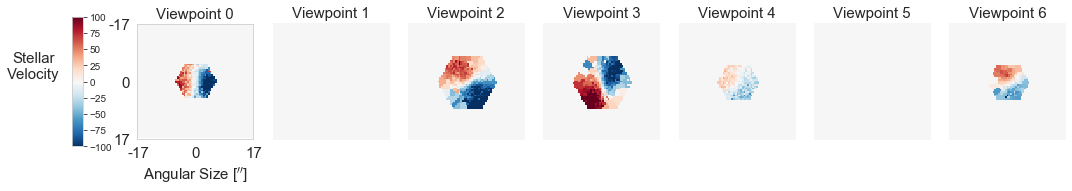

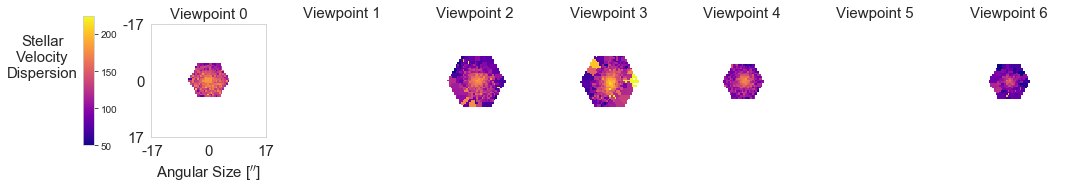

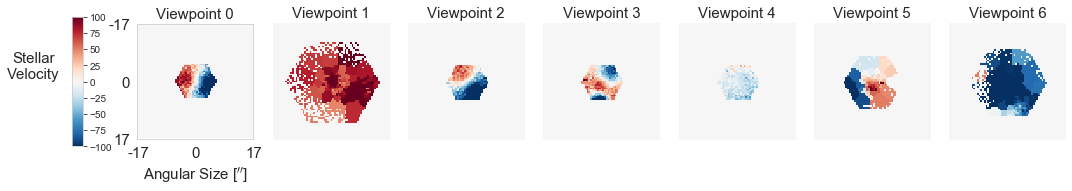

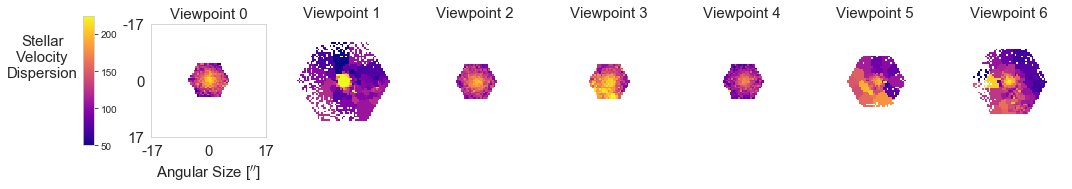

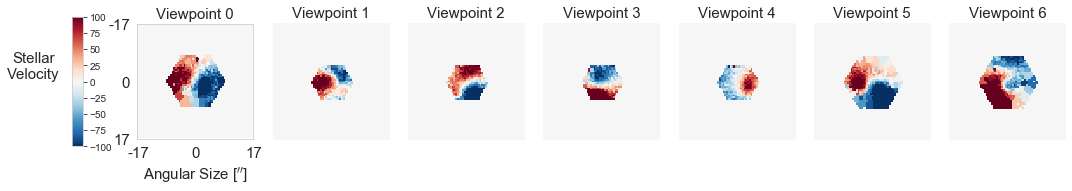

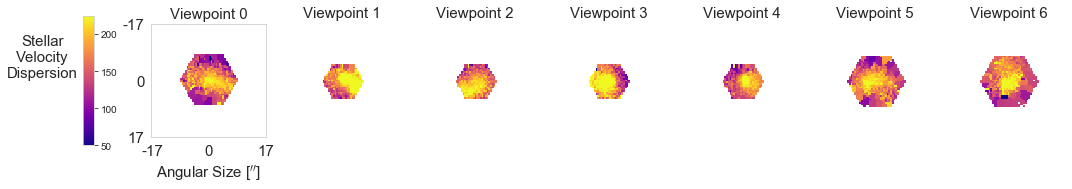

In [163]:
from astropy.io import fits
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
# Step to make velocity plots
myr_list=[170,180,185, 190, 195, 205, 210, 220, 225, 230, 240, 250, 260,265,275,285, 295,305,311, 315,320,    5,10,20,30,40,60,80,100,120,140,160]
# You are going to save these to your github page so that you can have an html link to them?
#myr = 210
myr_list=[195,205,210]
run='fg3_m12'
view_list=[0,1,2,3,4,5,6]
degrade = 'degraded'

#myr_list=[170]


for i in range(len(myr_list)):
    myr = myr_list[i]
    fig, axs = plt.subplots(1,7, figsize=(15, 6), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = .5, wspace=.2)

    axs = axs.ravel()
    for j in range(len(view_list)):
        view = view_list[j]
        try:
            kin_cube=fits.open('../kinematic_maps/kinematics_'+str(run)+'_'+str(myr)+'_'+str(view)+'_'+str(degrade)+'.fits')
            
        except FileNotFoundError:
            #could just be missing a viewpoint
            #so just construct a fake file
            fake = np.zeros((67,67))
            print('missing this viewpoint', j)
            if j ==0:
                im = axs[j].imshow(fake, cmap='RdBu_r', norm=MidpointNormalize(midpoint=0, vmin=-100, vmax=100))
            
                axs[j].set_xticks([0,np.shape(vel)[0]/2, np.shape(vel)[0]])
                axs[j].set_yticks([0,np.shape(vel)[0]/2, np.shape(vel)[0]])
                axs[j].set_xticklabels([-round(0.5*(np.shape(vel)[0]/2)),0,round(0.5*(np.shape(vel)[0]/2))])
                axs[j].set_yticklabels([-round(0.5*(np.shape(vel)[0]/2)),0,round(0.5*(np.shape(vel)[0]/2))])
                axs[j].set_xlabel('Angular Size [$^{\prime\prime}$]', size=15)
                axs[j].tick_params(axis='both', which='major', labelsize=15)
                axs[j].set_ylabel('Stellar\nVelocity', size=15, rotation=0, labelpad=75)
                cbaxes = fig.add_axes([0.07, 0.35, 0.01, 0.3]) 
                cb = plt.colorbar(im, cax = cbaxes,fraction=0.046, pad=0.04) 
            else:
                axs[j].axis('off')
                axs[j].imshow(fake, cmap='RdBu_r', norm=MidpointNormalize(midpoint=0, vmin=-100, vmax=100))
                axs[j].axis('off')
            axs[j].set_title('Viewpoint '+str(j), size=15)
            continue
        vel = np.ma.masked_where(kin_cube[1].data==0, kin_cube[1].data)

        if j ==0:
            im = axs[j].imshow(vel, cmap='RdBu_r', norm=MidpointNormalize(midpoint=0, vmin=-100, vmax=100))
            axs[j].set_xticks([0,np.shape(vel)[0]/2, np.shape(vel)[0]])
            axs[j].set_yticks([0,np.shape(vel)[0]/2, np.shape(vel)[0]])
            axs[j].set_xticklabels([-round(0.5*(np.shape(vel)[0]/2)),0,round(0.5*(np.shape(vel)[0]/2))])
            axs[j].set_yticklabels([-round(0.5*(np.shape(vel)[0]/2)),0,round(0.5*(np.shape(vel)[0]/2))])

            # Now adding the colorbar
            cbaxes = fig.add_axes([0.07, 0.35, 0.01, 0.3]) 
            cb = plt.colorbar(im, cax = cbaxes,fraction=0.046, pad=0.04) 
            #plt.colorbar(im)
            axs[j].set_xlabel('Angular Size [$^{\prime\prime}$]', size=15)
            axs[j].tick_params(axis='both', which='major', labelsize=15)
            axs[j].set_ylabel('Stellar\nVelocity', size=15, rotation=0, labelpad=75)
        else:
            axs[j].imshow(vel, cmap='RdBu_r', norm=MidpointNormalize(midpoint=0, vmin=-100, vmax=100))
            axs[j].axis('off')
        axs[j].set_title('Viewpoint '+str(j), size=15)
        #plt.colorbar(im)
    plt.tight_layout()
    plt.savefig('fg3_m12_panels/velocity_panel_'+str(run)+'_'+str(myr)+'.png', dpi=1000, bbox_to_inches='tight')
    
    # Also make a diagram for stellar velocity dispersion
    fig, axs = plt.subplots(1,7, figsize=(15, 6), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = .5, wspace=.2)

    axs = axs.ravel()
    for j in range(len(view_list)):
        view = view_list[j]
        try:
            kin_cube=fits.open('../kinematic_maps/kinematics_'+str(run)+'_'+str(myr)+'_'+str(view)+'_'+str(degrade)+'.fits')
            
        except FileNotFoundError:
            #could just be missing a viewpoint
            #so just construct a fake file
            fake = np.zeros((67,67))
            print('missing this viewpoint', j)
            if j ==0:
                im = axs[j].imshow(np.ma.masked_where(fake==0, fake), cmap='plasma', vmin=50, vmax=225)#, norm=matplotlib.colors.LogNorm(vmin=10, vmax=300))
            
                axs[j].set_xticks([0,np.shape(vel)[0]/2, np.shape(vel)[0]])
                axs[j].set_yticks([0,np.shape(vel)[0]/2, np.shape(vel)[0]])
                axs[j].set_xticklabels([-round(0.5*(np.shape(vel)[0]/2)),0,round(0.5*(np.shape(vel)[0]/2))])
                axs[j].set_yticklabels([-round(0.5*(np.shape(vel)[0]/2)),0,round(0.5*(np.shape(vel)[0]/2))])
                axs[j].set_xlabel('Angular Size [$^{\prime\prime}$]', size=15)
                axs[j].tick_params(axis='both', which='major', labelsize=15)
                axs[j].set_ylabel('Stellar\nVelocity\nDispersion', size=15, rotation=0, labelpad=80)
                
                cbaxes = fig.add_axes([0.08, 0.35, 0.01, 0.3]) 
                cb = plt.colorbar(im, cax = cbaxes,fraction=0.046, pad=0.04) 
            else:
                axs[j].axis('off')
                axs[j].imshow(np.ma.masked_where(fake==0, fake), cmap='plasma',norm=matplotlib.colors.LogNorm(vmin=10, vmax=300))
                axs[j].axis('off')
            axs[j].set_title('Viewpoint '+str(j), size=15)
            continue
        vel = np.ma.masked_where(kin_cube[1].data==0, kin_cube[3].data)

        if j ==0:
            im = axs[j].imshow(vel,  cmap='plasma', vmin=50, vmax=225)#norm=matplotlib.colors.LogNorm(vmin=10, vmax=300))
            axs[j].set_xticks([0,np.shape(vel)[0]/2, np.shape(vel)[0]])
            axs[j].set_yticks([0,np.shape(vel)[0]/2, np.shape(vel)[0]])
            axs[j].set_xticklabels([-round(0.5*(np.shape(vel)[0]/2)),0,round(0.5*(np.shape(vel)[0]/2))])
            axs[j].set_yticklabels([-round(0.5*(np.shape(vel)[0]/2)),0,round(0.5*(np.shape(vel)[0]/2))])

            # Now adding the colorbar
            cbaxes = fig.add_axes([0.08, 0.35, 0.01, 0.3]) 
            cb = plt.colorbar(im, cax = cbaxes,fraction=0.046, pad=0.04) 
            #plt.colorbar(im)
            axs[j].set_xlabel('Angular Size [$^{\prime\prime}$]', size=15)
            axs[j].tick_params(axis='both', which='major', labelsize=15)
            axs[j].set_ylabel('Stellar\nVelocity\nDispersion', size=15, rotation=0, labelpad=80)
        else:
            axs[j].imshow(vel, cmap='plasma', vmin=50, vmax=225)#, norm=matplotlib.colors.LogNorm(vmin=10, vmax=300))
            axs[j].axis('off')
        axs[j].set_title('Viewpoint '+str(j), size=15)
        #plt.colorbar(im)
    plt.tight_layout()
    plt.savefig('fg3_m12_panels/velocity_disp_panel_'+str(run)+'_'+str(myr)+'.png', dpi=1000, bbox_to_inches='tight')

In [ ]:
# Okay so there are two main aspects - first I'd like to display all plots for all position angles
# for a given moment in time.
# Second, I'd like to be able to togle through the different mountain plots for each simulation

In [135]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import Band
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models import Title
from bokeh.models.widgets import Panel, Tabs
from bokeh.models import ColumnDataSource, Range1d, LabelSet, Label
from bokeh.models import Arrow, OpenHead, NormalHead, VeeHead
from bokeh.models import Span
from bokeh.models import Range1d
from bokeh.layouts import gridplot

In [136]:
output_notebook()

Loading BokehJS ...

In [139]:
# create a new plot with default tools, using figure
# include tabs

output_file("mountin.html")

TOOLTIPS = [
    ('Time', "$myr_here"),
    
]
print('sorted inputs', sortedinput)
sort_coef = significant_coef
sort_std = significant_std
print('coeff', sort_coef )
print('std', sort_std)
sortedinput=significant_term

LDA_act = []
LDA_l = []
up = []
low = []
for j in range(len(myr_here)):
    LDA_act.append(str(round(sort_coef[-1]*input_1_means[j],1))+' + '+str(round(sort_coef[-2]*input_2_means[j],1))+' + '+str(round(sort_coef[-3]*input_3_means[j],1))+' + '+str(round(list_inter[new_min_index][0],1)))
    LDA_l.append(str(round(sort_coef[-1],1))+' '+sortedinput[-1]+' + '+str(round(sort_coef[-2],1))+' '+sortedinput[-2]+' + '+str(round(sort_coef[-3],1))+' '+sortedinput[-3]+' + '+str(round(list_inter[new_min_index][0],1)))
    up.append(new_means[j]+std[j])
    low.append(new_means[j]-std[j])
up_left=[]
low_left=[]
for j in range(len(myr_here_non_left)):
    up_left.append(new_means_non_left[j]+std_non_left[j])
    low_left.append(new_means_non_left[j]-std_non_left[j])
up_right=[]
low_right=[]
for j in range(len(myr_here_non_right)):
    up_right.append(new_means_non_right[j]+std_non_right[j])
    low_right.append(new_means_non_right[j]-std_non_right[j])
source = ColumnDataSource(data=dict(
    x=myr_here,
    y=new_means,
    upper=up,
    lower=low,
    x1=myr_here_non_left,
    y1=new_means_non_left,
    upper_l = up_left,
    lower_l = low_left,
    x2=myr_here_non_right,
    y2=new_means_non_right,
    upper_r = up_right,
    lower_r = low_right,
    desc=myr_here,
    LDA_list=LDA_l,
    LDA_actual=LDA_act,
    imgs=[
        'https://github.com/beckynevin/interactive_figs/blob/master/Mountain_plot_kin_fg3_m12_degraded_rot.png','https://bokeh.pydata.org/static/snake2.png',
        'https://bokeh.pydata.org/static/snake3D.png',
        'https://bokeh.pydata.org/static/snake4_TheRevenge.png',
        'https://bokeh.pydata.org/static/snakebite.jpg'
    ],
    fonts=[
        '<i>italics</i>',
        '<pre>pre</pre>',
        '<b>bold</b>',
        '<small>small</small>',
        '<del>del</del>'
    ]
))

TOOLTIPS = """
    <div>
        <div>
            <img
                src="@imgs" height="42" alt="@imgs" width="112"
                style="float: center; margin: 0px 15px 15px 0px;"
                border="2"
            ></img>
        </div>
        <div>
            <span style="font-size: 17px; font-weight: bold;">LD1 = @LDA_list</span>
        </div>
        <div>
        <span style="font-size: 17px; font-weight: bold;">$y = @LDA_actual</span>
        </div>
        
        <div>
            <span style="font-size: 15px;">Location</span>
            <span style="font-size: 10px; color: #f9a390;">($x, $y)</span>
        </div>
    </div>
"""

p = figure(plot_width=1300, plot_height=400,background_fill_color='#bdbcbd', tooltips=TOOLTIPS)
#p = figure(tools="wheel_zoom,reset", match_aspect=True, )
p.xgrid[0].grid_line_color=None
p.ygrid[0].grid_line_alpha=0.5

# Vertical line
'''vline1 = Span(location=early, dimension='height', line_color='black', line_width=2,line_dash='dashed')
vline2 = Span(location=coalescence, dimension='height', line_color='black', line_width=2,line_dash='dashed')
vline3 = Span(location=coalescence+0.5, dimension='height', line_color='black', line_width=2,line_dash='dashed')

# Horizontal line
hline = Span(location=mean_non, dimension='width', line_color='black', line_width=2)

p.renderers.extend([vline1, vline2, vline3, hline])'''


p.line('x', 'y', color='red', source=source, legend='Merger')
    
p.circle('x', 'y', fill_color='red', size=7, line_color='white', source=source, legend='Merger')#, zorder=100)
'''p.xgrid.grid_line_color=None
p.ygrid.grid_line_alpha=0.5
    
band = Band(base='x', lower='lower', upper='upper', source = source ,level='underlay',
            fill_alpha=0.25, line_width=0, fill_color='red')
p.add_layout(band)'''


'''p.line('x1', 'y1', color='blue', source=source, legend='Nonmerger')
p.circle('x1','y1', fill_color='blue', line_color='white', size=7, source=source, legend='Nonmerger')
band = Band(base='x1', lower='lower_l', upper='upper_l', source = source ,level='underlay',
            fill_alpha=0.25, line_width=0, fill_color='blue')
p.add_layout(band)

p.line('x2','y2', color='blue', source=source)
p.circle('x2','y2', fill_color='blue', line_color='white', size=7, source=source)
band = Band(base='x2', lower='lower_r', upper='upper_r', source = source ,level='underlay',
            fill_alpha=0.25, line_width=0, fill_color='blue')
p.add_layout(band)'''
#axes.set_xlim([min([min(myr_non),min(myr)]),max([max(myr_non),max(myr)])]) 

ymax =  max(new_means+std)
ymin = min(min(new_means_non_left-std_non_left),min(new_means_non_right-std_non_right))
    
p.x_range=Range1d(min(myr_here_non_left), max(myr_here_non_right))
p.y_range=Range1d(min(min(new_means_non_left-std_non_left),min(new_means_non_right-std_non_right)), max(new_means+std))


labels = LabelSet(x='x', y='y', text='x', level='glyph',
              x_offset=5, y_offset=5, source=source, render_mode='canvas')

peri = Label(x=myr_here[0], y=ymax-1, x_units='data', y_units='data',
                 text='First Pericentric Passage', render_mode='css',
                 border_line_color='black', border_line_alpha=0.0,
                 background_fill_color='white', background_fill_alpha=0.0)
coal = Label(x=coalescence+0.03, y=ymax-1, x_units='data', y_units='data',
                 text='Coalescence', render_mode='css',
                 border_line_color='black', border_line_alpha=0.0,
                 background_fill_color='white', background_fill_alpha=0.0)

# Now all the merger stages labels, maybe place them down below?
PC = Label(x=coalescence+0.03, y=ymax-0.5, x_units='data', y_units='data',
                 text='Post-Coalescence', render_mode='css',
                 border_line_color='black', border_line_alpha=0.20,
                 background_fill_color='red', background_fill_alpha=0.4)

L = Label(x=early+0.1, y=ymax-0.5, x_units='data', y_units='data',
                 text='Late', render_mode='css',
                 border_line_color='black', border_line_alpha=0.3,
                 background_fill_color='red', background_fill_alpha=0.4)

E = Label(x=early-0.3, y=ymax-0.5, x_units='data', y_units='data',
                 text='Early', render_mode='css',
                 border_line_color='black', border_line_alpha=0.3,
                 background_fill_color='red', background_fill_alpha=0.4)


p.add_layout(Arrow(end=VeeHead(size=10), line_color="black",
                   x_start=myr_here[0], y_start=ymax-1, x_end=myr_here[0], y_end=new_means[0]+0.2))
p.add_layout(Arrow(end=VeeHead(size=10), line_color="black",
                   x_start=coalescence+0.03, y_start=ymax-1, x_end=coalescence, y_end=new_means[coal_i][0]+0.2))
p.add_layout(Title(text="Merger Timeline [Gyr]", align="center"), "below")
p.add_layout(Title(text="LD1", align="center"), "left")

#p.add_layout(labels)
p.add_layout(peri)
p.add_layout(coal)
p.add_layout(PC)
p.add_layout(E)
p.add_layout(L)

empty = figure(plot_width=1300, plot_height=400,background_fill_color='#bdbcbd')
p1 = gridplot([p, empty], ncols=1)

tab1 = Panel(child=p1, title=r'q = 0.5, fg = 0.3')
tabs = Tabs(tabs=[tab1])
show(tabs) # show the results




sorted inputs ['lambda_r', 's_asym', 'A_2', 'sa*resids', 'resids*A2', 'resids']
coeff [-0.43989555413650494, 1.2059860633909971, 1.4059054855049227, -1.6494080365432269, -1.6810263681673092, 2.6435376662856367]
std [0.11264007982251777, 0.10873827820728282, 0.1479866220991269, 0.32789901360017265, 0.1773694524117943, 0.30376362420965386]


In [129]:


output_file("toolbar.html")

source = ColumnDataSource(data=dict(
    x=[1, 2, 3, 4, 5],
    y=[2, 5, 8, 2, 7],
    desc=['A', 'b', 'C', 'd', 'E'],
    imgs=[
        'https://drive.google.com/file/d/0B7TzwIvKos1gWVNuWWxKOTFDX2s/view?usp=sharing',
        'https://bokeh.pydata.org/static/snake2.png',
        'https://bokeh.pydata.org/static/snake3D.png',
        'https://bokeh.pydata.org/static/snake4_TheRevenge.png',
        'https://bokeh.pydata.org/static/snakebite.jpg'
    ],
    fonts=[
        '<i>italics</i>',
        '<pre>pre</pre>',
        '<b>bold</b>',
        '<small>small</small>',
        '<del>del</del>'
    ]
))


TOOLTIPS = """
    <div>
        <div>
            <img
                src="@imgs" height="42" alt="@imgs" width="42"
                style="float: left; margin: 0px 100px 15px 0px;"
                border="2"
            ></img>
        </div>
        <div>
            <span style="font-size: 17px; font-weight: bold;">@desc</span>
            <span style="font-size: 15px; color: #966;">[$index]</span>
        </div>
        <div>
            <span>@fonts{safe}</span>
        </div>
        <div>
            <span style="font-size: 15px;">Location</span>
            <span style="font-size: 10px; color: #696;">($x, $y)</span>
        </div>
    </div>
"""

p = figure(plot_width=400, plot_height=400, tooltips=TOOLTIPS,
           title="Mouse over the dots")

p.circle('x', 'y', size=20, source=source)

show(p)

In [140]:
import numpy as np

from bokeh.layouts import grid, column
from bokeh.models import CustomJS, Slider, ColumnDataSource
from bokeh.plotting import figure, output_file, show

output_file('dashboard.html')

tools = 'pan'


def bollinger():
    # Define Bollinger Bands.
    upperband = np.random.randint(100, 150+1, size=100)
    lowerband = upperband - 100
    x_data = np.arange(1, 101)

    # Bollinger shading glyph:
    band_x = np.append(x_data, x_data[::-1])
    band_y = np.append(lowerband, upperband[::-1])

    p = figure(x_axis_type='datetime', tools=tools)
    p.patch(band_x, band_y, color='#7570B3', fill_alpha=0.2)

    p.title.text = 'Bollinger Bands'
    p.title_location = 'left'
    p.title.align = 'left'
    p.plot_height = 600
    p.plot_width = 800
    p.grid.grid_line_alpha = 0.4
    return [p]


def slider():
    x = np.linspace(0, 10, 100)
    y = np.sin(x)

    source = ColumnDataSource(data=dict(x=x, y=y))

    plot = figure(
        y_range=(-10, 10), tools='', toolbar_location=None,
        title="Sliders example")
    plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)

    amp_slider = Slider(start=0.1, end=10, value=1, step=.1, title="Amplitude")
    freq_slider = Slider(start=0.1, end=10, value=1, step=.1, title="Frequency")
    phase_slider = Slider(start=0, end=6.4, value=0, step=.1, title="Phase")
    offset_slider = Slider(start=-5, end=5, value=0, step=.1, title="Offset")

    callback = CustomJS(args=dict(source=source, amp=amp_slider, freq=freq_slider, phase=phase_slider, offset=offset_slider),
                        code="""
        const data = source.data;
        const A = amp.value;
        const k = freq.value;
        const phi = phase.value;
        const B = offset.value;
        const x = data['x']
        const y = data['y']
        for (var i = 0; i < x.length; i++) {
            y[i] = B + A*Math.sin(k*x[i]+phi);
        }
        source.change.emit();
    """)

    amp_slider.js_on_change('value', callback)
    freq_slider.js_on_change('value', callback)
    phase_slider.js_on_change('value', callback)
    offset_slider.js_on_change('value', callback)

    widgets = column(amp_slider, freq_slider, phase_slider, offset_slider)
    return [widgets, plot]


def linked_panning():
    N = 100
    x = np.linspace(0, 4 * np.pi, N)
    y1 = np.sin(x)
    y2 = np.cos(x)
    y3 = np.sin(x) + np.cos(x)

    s1 = figure(tools=tools)
    s1.circle(x, y1, color="navy", size=8, alpha=0.5)
    s2 = figure(tools=tools, x_range=s1.x_range, y_range=s1.y_range)
    s2.circle(x, y2, color="firebrick", size=8, alpha=0.5)
    s3 = figure(tools='pan, box_select', x_range=s1.x_range)
    s3.circle(x, y3, color="olive", size=8, alpha=0.5)
    return [s1, s2, s3]

l = grid([
    bollinger(),
    slider(),
    linked_panning(),
], sizing_mode='stretch_both')

show(l)

In [147]:
from ipywidgets import interact
from bokeh.io import output_notebook, show, push_notebook
from bokeh.models.widgets import Div

output_file('pokemon.html')
output_notebook()
div_image = Div(text="""<img src="https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/1.png" alt="div_image">""", width=200, height=200)

def update(pokemon_number=1):
    div_image.text = """<img src="https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/{}.png" alt="div_image">""".format(pokemon_number)
    push_notebook()

show(div_image, notebook_handle=True)

interact(update, pokemon_number=[1, 4, 7])

Loading BokehJS ...

interactive(children=(Dropdown(description='pokemon_number', options=(1, 4, 7), value=1), Output()), _dom_clas…

<function __main__.update(pokemon_number=1)>

In [166]:
# Maybe try to do this for your own 

from ipywidgets import interact

from bokeh.io import output_notebook, show, push_notebook
from bokeh.models.widgets import Div

#output_notebook()
div_image = Div(text="""<img src="https://github.com/beckynevin/interactive_figs/blob/master/fg3_m12_panels/velocity_disp_panel_fg3_m12_195.png?raw=true" alt="div_image">""", width=1000, height=400)

def update(pokemon_number=1):
    div_image.text = """<img src="https://github.com/beckynevin/interactive_figs/blob/master/fg3_m12_panels/velocity_disp_panel_fg3_m12_{}.png?raw=true" alt="div_image">""".format(pokemon_number)
    push_notebook()

show(div_image, notebook_handle=True)

interact(update, pokemon_number=[195, 205])

interactive(children=(Dropdown(description='pokemon_number', options=(195, 205), value=195), Output()), _dom_c…

<function __main__.update(pokemon_number=1)>